In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras import regularizers
from tensorflow.keras.optimizers import RMSprop, Adam
import glob 
from PIL import Image

# ignore unnecessary warning

filterwarnings('ignore', category=DeprecationWarning)
filterwarnings('ignore', category=FutureWarning)
filterwarnings('ignore', category=UserWarning)

Using TensorFlow backend.


In [2]:
no_data_path = Path('../brain_tumor_detection/no')
yes_data_path = Path('../brain_tumor_detection/yes')

In [3]:
no_jpg_path = list(no_data_path.glob(r"*.jpg"))
yes_jpg_path = list(yes_data_path.glob(r"*.jpg"))

In [4]:
print(no_jpg_path[0:5])
print('------'*20)
print(yes_jpg_path[0:5])

[WindowsPath('../brain_tumor_detection/no/no0.jpg'), WindowsPath('../brain_tumor_detection/no/no1.jpg'), WindowsPath('../brain_tumor_detection/no/no10.jpg'), WindowsPath('../brain_tumor_detection/no/no100.jpg'), WindowsPath('../brain_tumor_detection/no/no1000.jpg')]
------------------------------------------------------------------------------------------------------------------------
[WindowsPath('../brain_tumor_detection/yes/y0.jpg'), WindowsPath('../brain_tumor_detection/yes/y1.jpg'), WindowsPath('../brain_tumor_detection/yes/y10.jpg'), WindowsPath('../brain_tumor_detection/yes/y100.jpg'), WindowsPath('../brain_tumor_detection/yes/y1000.jpg')]


In [5]:
yes_no_list = []

for no_jpg in no_jpg_path:
    yes_no_list.append(no_jpg)
    
for yes_jpg in yes_jpg_path:
    yes_no_list.append(yes_jpg)

In [6]:
print(yes_no_list[0:10])

[WindowsPath('../brain_tumor_detection/no/no0.jpg'), WindowsPath('../brain_tumor_detection/no/no1.jpg'), WindowsPath('../brain_tumor_detection/no/no10.jpg'), WindowsPath('../brain_tumor_detection/no/no100.jpg'), WindowsPath('../brain_tumor_detection/no/no1000.jpg'), WindowsPath('../brain_tumor_detection/no/no1001.jpg'), WindowsPath('../brain_tumor_detection/no/no1002.jpg'), WindowsPath('../brain_tumor_detection/no/no1003.jpg'), WindowsPath('../brain_tumor_detection/no/no1004.jpg'), WindowsPath('../brain_tumor_detection/no/no1005.jpg')]


In [7]:
jpg_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], yes_no_list))

In [8]:
jpg_labels[0:10]

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']

In [9]:
print(jpg_labels.count('no'))
print(jpg_labels.count('yes'))

1500
1500


In [10]:
jpg_path_series = pd.Series(yes_no_list, name='jpg').astype(str)
jpg_category_series = pd.Series(jpg_labels, name='category')

In [11]:
main_train_data = pd.concat([jpg_path_series, jpg_category_series], axis=1)

In [12]:
print(main_train_data.head(-1))

                                         jpg category
0        ..\brain_tumor_detection\no\no0.jpg       no
1        ..\brain_tumor_detection\no\no1.jpg       no
2       ..\brain_tumor_detection\no\no10.jpg       no
3      ..\brain_tumor_detection\no\no100.jpg       no
4     ..\brain_tumor_detection\no\no1000.jpg       no
...                                      ...      ...
2994   ..\brain_tumor_detection\yes\y994.jpg      yes
2995   ..\brain_tumor_detection\yes\y995.jpg      yes
2996   ..\brain_tumor_detection\yes\y996.jpg      yes
2997   ..\brain_tumor_detection\yes\y997.jpg      yes
2998   ..\brain_tumor_detection\yes\y998.jpg      yes

[2999 rows x 2 columns]


In [13]:
prediction_path = Path('../brain_tumor_detection/pred')
Test_jpg_path = list(prediction_path.glob(r'*.jpg'))
print(Test_jpg_path[:5])

[WindowsPath('../brain_tumor_detection/pred/pred0.jpg'), WindowsPath('../brain_tumor_detection/pred/pred1.jpg'), WindowsPath('../brain_tumor_detection/pred/pred10.jpg'), WindowsPath('../brain_tumor_detection/pred/pred11.jpg'), WindowsPath('../brain_tumor_detection/pred/pred12.jpg')]


In [14]:
Test_jpg_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], 
                          Test_jpg_path))

In [15]:
print(Test_jpg_labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [16]:
Test_jpg_path_series = pd.Series(Test_jpg_path, name='jpg').astype(str)
Test_jpg_labels_series = pd.Series(Test_jpg_labels, name='category')

In [17]:
Test_data = pd.concat([Test_jpg_path_series, Test_jpg_labels_series], axis=1)

In [18]:
Test_data.head()

,jpg,category
0,..\brain_tumor_detection\pred\pred0.jpg,pred
1,..\brain_tumor_detection\pred\pred1.jpg,pred
2,..\brain_tumor_detection\pred\pred10.jpg,pred
3,..\brain_tumor_detection\pred\pred11.jpg,pred
4,..\brain_tumor_detection\pred\pred12.jpg,pred


In [19]:
main_train_data = main_train_data.sample(frac=1).reset_index(drop=True)

In [20]:
main_train_data.head()

,jpg,category
0,..\brain_tumor_detection\yes\y184.jpg,yes
1,..\brain_tumor_detection\no\no1146.jpg,no
2,..\brain_tumor_detection\no\no832.jpg,no
3,..\brain_tumor_detection\yes\y1442.jpg,yes
4,..\brain_tumor_detection\no\no1335.jpg,no


Text(0.5, 1.0, 'no')

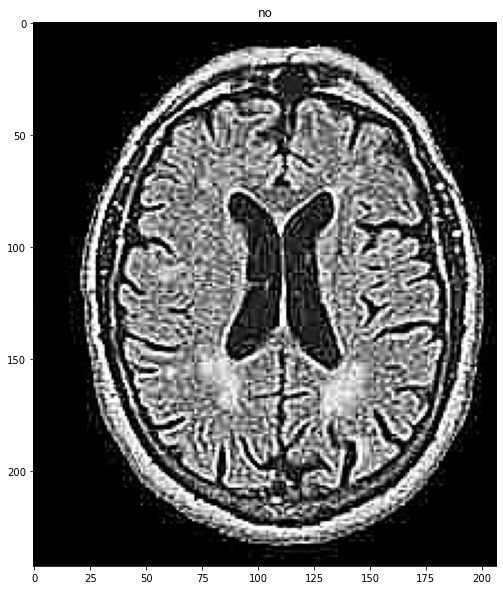

In [21]:
figure = plt.figure(figsize=(10, 10))
plt.imshow(plt.imread(main_train_data['jpg'][10]))
plt.title(main_train_data['category'][10])

Text(0.5, 1.0, 'no')

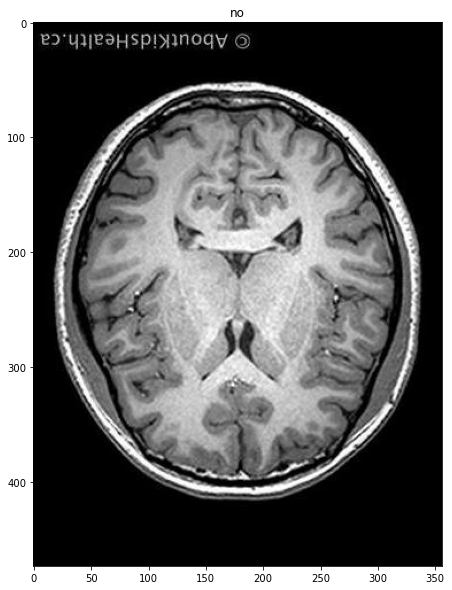

In [22]:
figure = plt.figure(figsize=(10, 10))
plt.imshow(plt.imread(main_train_data['jpg'][2997]))
plt.title(main_train_data['category'][2997])

Text(0.5, 1.0, 'no')

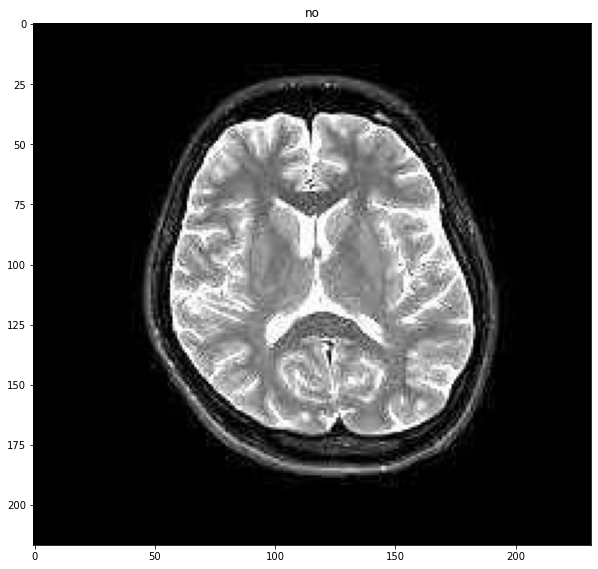

In [23]:
figure = plt.figure(figsize=(10, 10))
plt.imshow(plt.imread(main_train_data['jpg'][1]))
plt.title(main_train_data['category'][1])

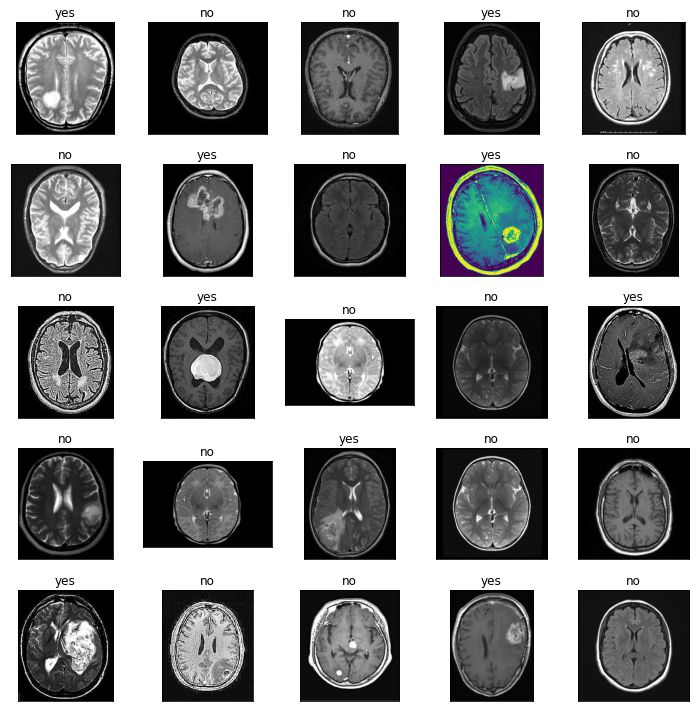

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10), 
                        subplot_kw={'xticks' : [], 'yticks' : []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(main_train_data['jpg'][i]))
    ax.set_title(main_train_data['category'][i])
plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(main_train_data, train_size=0.9, random_state=42)

In [26]:
train_data.shape

(2700, 2)

In [27]:
test_data.shape

(300, 2)

In [28]:
train_data.head()

,jpg,category
433,..\brain_tumor_detection\yes\y340.jpg,yes
1151,..\brain_tumor_detection\yes\y42.jpg,yes
73,..\brain_tumor_detection\yes\y1231.jpg,yes
1536,..\brain_tumor_detection\no\no1280.jpg,no
2709,..\brain_tumor_detection\yes\y601.jpg,yes


In [29]:
generator_basic = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1)

In [30]:
train_set = generator_basic.flow_from_dataframe(train_data,
                                               x_col='jpg',
                                               y_col='category',
                                               color_mode='grayscale',
                                               class_mode='categorical',
                                               subset='training',
                                               batch_size=20,
                                               target_size=(224, 224))

Found 2430 validated image filenames belonging to 2 classes.


In [31]:
val_set = generator_basic.flow_from_dataframe(train_data,
                                             x_col='jpg',
                                             y_col='category',
                                             color_mode='grayscale',
                                             class_model='categorical',
                                             subset='validation',
                                             batch_size=20,
                                             target_size=(224, 224))

Found 270 validated image filenames belonging to 2 classes.


In [32]:
test_set = generator_basic.flow_from_dataframe(test_data,
                                              x_col='jpg',
                                              y_col='category',
                                              color_mode='grayscale',
                                              class_mode='categorical',
                                              batch_size=20,
                                              target_size=(224, 224))

Found 300 validated image filenames belonging to 2 classes.


In [33]:
for data_batch, label_batch in train_set:
    print('data shape: ', data_batch.shape)
    print('label shape :', label_batch.shape)
    break

data shape:  (20, 224, 224, 1)
label shape : (20, 2)


In [34]:
for data_batch, label_batch in val_set:
    print('data shape: ', data_batch.shape)
    print('label shape :', label_batch.shape)
    break

data shape:  (20, 224, 224, 1)
label shape : (20, 2)


In [35]:
for data_batch, label_batch in test_set:
    print('data shape: ', data_batch.shape)
    print('label shape :', label_batch.shape)
    break

data shape:  (20, 224, 224, 1)
label shape : (20, 2)


In [36]:
print(train_set.class_indices)
print(train_set.classes[0:5])
print(train_set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 0, 0, 0]
(224, 224, 1)


In [37]:
print(val_set.class_indices)
print(val_set.classes[0:5])
print(val_set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 1, 0, 1]
(224, 224, 1)


In [38]:
print(test_set.class_indices)
print(test_set.classes[0:5])
print(test_set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 1, 1, 1]
(224, 224, 1)


In [47]:
Model = Sequential([
    Conv2D(32,(5,5),activation="relu",input_shape=(224,224,1)),
    MaxPool2D((2,2)),
    Dropout(0.2),
    
    Conv2D(64,(3,3),activation="relu"),
    MaxPool2D((2,2)),
    Dropout(0.2),
    
    Conv2D(128,(3,3),activation="relu"),
    MaxPool2D((2,2)),
    Dropout(0.2),
    
    Conv2D(256, (3,3),activation="relu"),
    MaxPool2D((2,2)),
    Dropout(0.2),
    
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])
Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 220, 220, 32)      832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 128)      

In [48]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [49]:
ANN_Model = Model.fit(train_set,validation_data=val_set,
                      epochs=30,steps_per_epoch=120)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 120 steps, validate for 14 steps
Epoch 1/30
120/120 [==============================] - 13s 109ms/step - loss: 0.7561 - accuracy: 0.7167 - val_loss: 0.7047 - val_accuracy: 0.6185
Epoch 2/30
120/120 [==============================] - 5s 45ms/step - loss: 0.4173 - accuracy: 0.8205 - val_loss: 0.3056 - val_accuracy: 0.8593
Epoch 3/30
120/120 [==============================] - 5s 45ms/step - loss: 0.3393 - accuracy: 0.8594 - val_loss: 0.2333 - val_accuracy: 0.9370
Epoch 4/30
120/120 [==============================] - 5s 45ms/step - loss: 0.2494 - accuracy: 0.8975 - val_loss: 0.1989 - val_accuracy: 0.9148
Epoch 5/30
120/120 [==============================] - 5s 45ms/step - loss: 0.1947 - accuracy: 0.9347 - val_loss: 0.1595 - val_accuracy: 0.9407
Epoch 6/30
120/120 [==============================] - 5s 44ms/step - loss: 0.1679 - accuracy: 0.9431 - val_loss: 0.2866 - val_accuracy: 0.8852
Epoch 7/30
120/120 [===========================

In [52]:
history = ANN_Model.history

val_losses = history['val_loss']
val_acc = history['val_accuracy']
acc = history['accuracy']
losses = history['loss']
epochs = range(1, len(val_losses)+1)

No handles with labels found to put in legend.


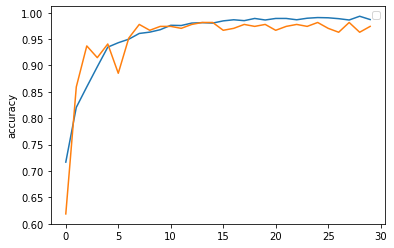

In [53]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.ylabel('accuracy')
plt.legend()
plt.show()

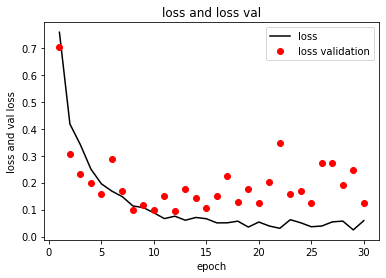

In [54]:
plt.plot(epochs, losses, 'k-', label='loss')
plt.plot(epochs, val_losses, 'ro', label='loss validation')
plt.title('loss and loss val')
plt.xlabel('epoch')
plt.ylabel('loss and val loss')
plt.legend()
plt.show()

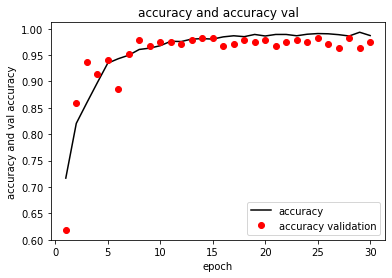

In [55]:
plt.plot(epochs, acc, 'k-', label='accuracy')
plt.plot(epochs, val_acc, 'ro', label='accuracy validation')
plt.title('accuracy and accuracy val')
plt.xlabel('epoch')
plt.ylabel('accuracy and val accuracy')
plt.legend()
plt.show()

In [56]:
model_results = Model.evaluate(test_set, verbose=False)
print("LOSS: " + "%.4f" % model_results[0])
print("ACCURACY: " + "%.2f" % model_results[1])

  ...
    to  
  ['...']
LOSS: 0.1673
ACCURACY: 0.98
